# Модуль 2. **Дослідницький аналіз даних**

## Частина перша: Знайомство з Pandas

In [89]:
import matplotlib.pyplot as plt
import pandas as pd

#### Прочитайте дані за допомогою методу read_html з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)" [посилання](https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C)

In [90]:
source = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
df = pd.read_html(
    io=source,
    match="Коефіцієнт народжуваності в регіонах України",
    thousands=".",
    decimal=",",
)[0]

##### Вивести перші рядки таблиці за допомогою методу head

In [91]:
df.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,—


##### Визначте кількість рядків та стовпців у датафреймі (атрибут shape)

In [92]:
print('рядків  :', df.shape[0])
print("стовпців: ", df.shape[1])

рядків  : 28
стовпців:  9


##### Замініть у таблиці значення "—" на значення NaN

In [93]:
df.replace("—", pd.NA, inplace=True)
df

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,<NA>,<NA>
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,<NA>
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


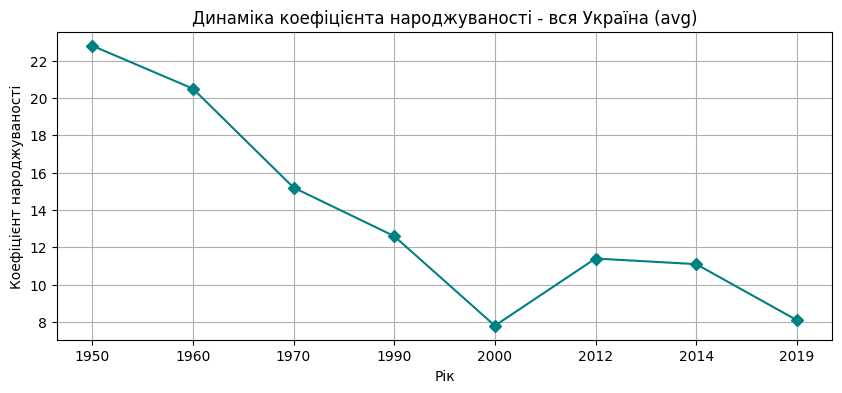

In [94]:
plt.figure(figsize=(10, 4))
plt.plot(df.columns[1:], df.iloc[-1][1:], color="teal", marker="D")
plt.xlabel("Рік")
plt.ylabel("Коефіцієнт народжуваності")
plt.grid()
plt.title("Динаміка коефіцієнта народжуваності - вся Україна (avg)")
plt.show()

##### Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [95]:
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

##### Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"

In [96]:
df[["2014", "2019"]] = df[["2014", "2019"]].apply(pd.to_numeric, errors="coerce")
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object

##### Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [97]:
# ToDo - зробити таблицю з 3 колонок
print('кількість:')
print(df.isnull().sum()[1:])
print('частка:')
print(round((df.isnull().sum() / df.shape[0])[1:], 3))

кількість:
1950    2
1960    1
1970    1
1990    0
2000    0
2012    0
2014    2
2019    4
dtype: int64
частка:
1950    0.071
1960    0.036
1970    0.036
1990    0.000
2000    0.000
2012    0.000
2014    0.071
2019    0.143
dtype: float64


##### Видаліть з таблиці дані по всій країні, останній рядок таблиці

In [98]:
df.drop(df.index[-1], axis=0, inplace=True)
df

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


##### Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

In [99]:
df = round(df.fillna(df.iloc[:, 1:].mean()), 2)
df

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.60,16.0,13.0,7.3,12.6,11.14,8.02
1,Вінницька,22.4,19.20,14.2,12.4,8.4,11.2,10.90,7.60
2,Волинська,24.7,25.00,17.9,15.3,11.2,14.8,14.10,10.10
3,Дніпропетровська,20.4,20.40,15.1,12.3,7.1,11.2,11.10,7.10
4,Донецька,27.1,21.40,14.0,10.9,6.1,9.8,8.20,8.02
5,Житомирська,26.1,22.30,15.9,12.9,8.9,12.2,12.00,7.90
6,Закарпатська,31.4,27.30,20.7,16.8,11.5,15.1,14.60,10.40
7,Запорізька,21.9,19.70,15.0,12.4,7.1,10.6,10.60,6.80
8,Івано-Франківська,24.3,24.80,18.2,15.5,10.3,12.4,12.20,8.80
9,Київська,20.4,18.90,15.6,12.3,7.3,12.2,12.10,8.00


##### Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

In [100]:
ukraine_avg_birth = df["2019"].mean()
print("Середня народжуваність по Україні у 2019 році: ", round(ukraine_avg_birth, 3))

regions_avg_birth = df.groupby("Регіон")["2019"].mean()
regions_above_average = regions_avg_birth[regions_avg_birth > ukraine_avg_birth]

print('Регіони, де рівень народжуваності в 2019 році був більшим за середній по Україні: ')
print(regions_above_average)

Середня народжуваність по Україні у 2019 році:  8.018
Регіони, де рівень народжуваності в 2019 році був більшим за середній по Україні: 
Регіон
Івано-Франківська     8.80
Волинська            10.10
Донецька              8.02
Закарпатська         10.40
Київ                 11.00
Крим                  8.02
Луганська             8.02
Львівська             8.70
Одеська               8.80
Рівненська           10.70
Севастополь           8.02
Херсонська            8.10
Чернівецька           9.20
Name: 2019, dtype: float64


##### У якому регіоні була найвища народжуваність у 2014 році?

In [101]:
print('Найвища народжуваність 2014 року по Україні: ', df.loc[df["2014"].idxmax(), "Регіон"], "-", df.loc[df["2014"].idxmax(), "2014"])

Найвища народжуваність 2014 року по Україні:  Рівненська - 14.8


##### Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

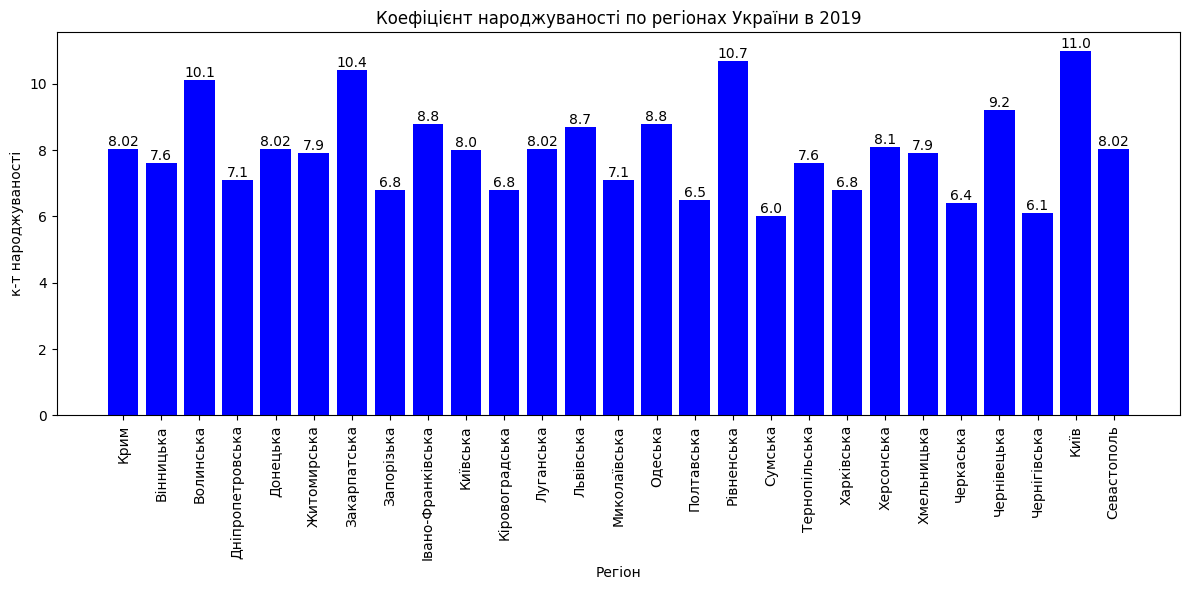

In [102]:
plt.figure(figsize=(12, 6))
plt.title("Коефіцієнт народжуваності по регіонах України в 2019")
plt.ylabel("к-т народжуваності")
plt.xlabel("Регіон")
plt.xticks(rotation=90)
bars = plt.bar(df["Регіон"], df["2019"], color="blue")
plt.tight_layout()

for bar in bars:
    val = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        val,
        round(val, 2),
        va="bottom",
        ha="center",
    )

plt.show()

In [ ]:
colors = [
    "skyblue",
    "lightgreen",
    "lightcoral",
    "orange",
    "pink",
    "lightblue",
    "yellow",
    "purple",
    "cyan",
    "lightgray",
    "magenta",
    "lime",
    "teal",
    "lavender",
    "salmon",
    "gold",
    "brown",
    "olive",
    "peru",
    "aquamarine",
    "lightpink",
    "plum",
    "khaki",
    "orchid",
    "tan",
    "mediumaquamarine",
    "orangered",
    "royalblue",
]

C:\Users\ks797\AppData\Local\Temp\ipykernel_4556\1508589159.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(x, df.iloc[region][1:], color=colors[region], marker="o", label=df.iloc[region][0])


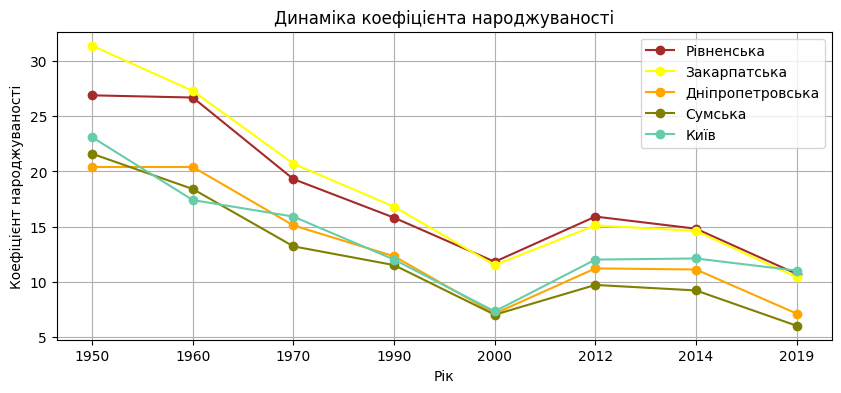

In [114]:
regions = [16, 6, 3, 17] # підставити номери регіонів (таблиця df)

x = df.columns[1:]

plt.figure(figsize=(10, 4))
for region in regions:
    plt.plot(x, df.iloc[region][1:], color=colors[region], marker="o", label=df.iloc[region][0])

plt.xlabel("Рік")
plt.ylabel("Коефіцієнт народжуваності")
plt.grid()
plt.title("Динаміка коефіцієнта народжуваності")
plt.legend() 

plt.show()